# 2.3 Feature Selection

**Step 1: Feature Importance (Random Forest)**

In [90]:
print(X.shape)
print(y.shape)

(299, 18)
(920,)


In [97]:
# Use the same source dataframe
X = df_scaled.drop(columns=['num'])
y = df_scaled['num']

print(X.shape, y.shape)  # ✅ Should both be (299, …)


(299, 18) (299,)


In [99]:
# Convert target to binary
y = df_scaled['num'].copy()
y = y.apply(lambda x: 1 if x > 0 else 0)

print(y.value_counts())  # Should show 0 and 1 only


num
0    161
1    138
Name: count, dtype: int64


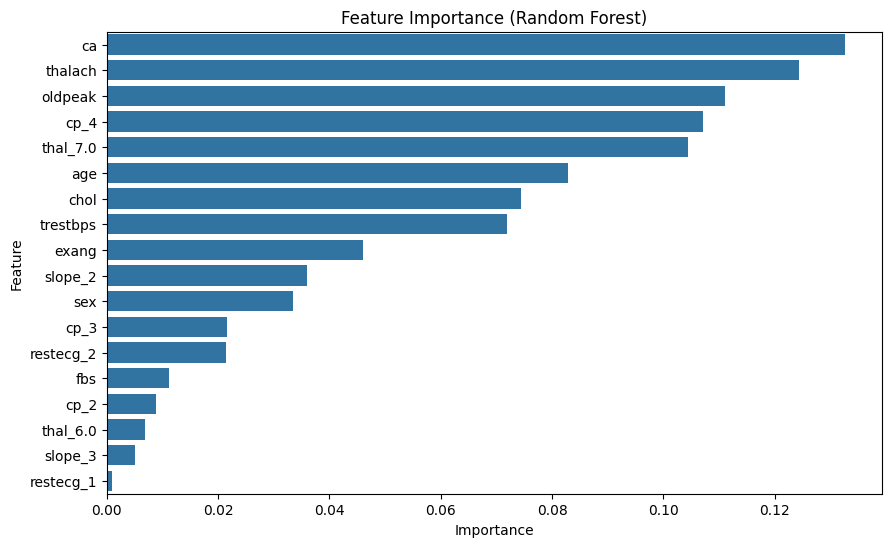

      Feature  Importance
8          ca    0.132611
5     thalach    0.124397
7     oldpeak    0.111017
11       cp_4    0.107105
17   thal_7.0    0.104424
0         age    0.082924
3        chol    0.074393
2    trestbps    0.071946
6       exang    0.046024
14    slope_2    0.035933
1         sex    0.033395
10       cp_3    0.021542
13  restecg_2    0.021430
4         fbs    0.011156
9        cp_2    0.008793
16   thal_6.0    0.006929
15    slope_3    0.005048
12  restecg_1    0.000934


In [100]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

print(feature_importance_df)

**Recursive Feature Elimination (RFE)**

In [102]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# RFE: select top 8 features
rfe = RFE(estimator=rf, n_features_to_select=8)
rfe.fit(X, y)

# Get selected features
rfe_features = X.columns[rfe.support_].tolist()
print("✅ Selected Features by RFE:", rfe_features)


✅ Selected Features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4', 'thal_7.0']


**Chi-Square Test**

In [103]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1]
X_scaled = MinMaxScaler().fit_transform(X)

# Chi-Square: select top 8
chi2_selector = SelectKBest(score_func=chi2, k=8)
chi2_selector.fit(X_scaled, y)

chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("✅ Top Features by Chi-Square:", chi2_features)


✅ Top Features by Chi-Square: ['exang', 'oldpeak', 'ca', 'cp_2', 'cp_3', 'cp_4', 'slope_2', 'thal_7.0']


**Combine Results to Get Final Features**

In [104]:
# Take union of selected features
top_features_rf = feature_importance_df['Feature'].head(8).tolist()  # from RF importance
final_features = list(set(top_features_rf) | set(rfe_features) | set(chi2_features))
print("✅ Final Selected Features for Modeling:", final_features)

# Create reduced dataset
X_reduced = X[final_features]
print("Reduced dataset shape:", X_reduced.shape)


✅ Final Selected Features for Modeling: ['slope_2', 'trestbps', 'cp_2', 'cp_4', 'cp_3', 'chol', 'exang', 'ca', 'thalach', 'oldpeak', 'age', 'thal_7.0']
Reduced dataset shape: (299, 12)
